###**ATOC4500 Data Science Lab: Homework #2 - SOLUTIONS**
###last updated: February 21, 2022, Written By: Prof. Jennifer Kay (Jennifer.E.Kay@colorado.edu)

**>>>> NOTE: Please run this and other notebooks using a Chrome browser**

LEARNING GOALS:
1) Use Google Colab and Python to apply data science methods: read in data, make line plots and histograms, do computations
2) Compute statistical indices of data using a function
3) Compare the data distribution to a normal distribution: Q-Q plot
4) Compute confidence intervals using z-statistic and t-statistic

**STEP 1: Import functions we need**

In [3]:
import datetime
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
#from scipy.stats import norm
import scipy.stats as stats
from scipy import integrate

#from google.colab import files

**STEP 2: Upload the data we want to perform calculations on**
Here, the data we will use will be very similar to Application Lab #1.
The only difference is that instead of the global mean temperature,
we will work with the Arctic mean temperature (60-90 N).
Because there are very few Arctic temperature measurements before 1950,
we will not work with data from before 1950.

** The data file storing global mean surface temperature anomalies is called aravg.mon.land_ocean.60N.90N.v5.0.0.202112.asc.  It is available on Canvas. You should save it on your laptop, preferably on your google drive.  You will upload the data in the next cell**

For reference: This file can be found at https://www.ncei.noaa.gov/data/noaa-global-surface-temperature/v5/access/timeseries/ and is described at https://www.ncei.noaa.gov/products/land-based-station/noaa-global-temp

**NOTES on the data**: 
*   anomalies are based on 1971-2000 average.  recall: anomalies = difference from the long-term average
*   monthly data starts in January 1880
*   from the README file (00_Readme_timeseries.txt) we see that we need the first 3 columns for the monthly data (file name: aravg.mon.*): 1st column = year, 2nd column = month, 3rd column = anomaly of temperature (K)

In [2]:
# PLEASE MAKE SURE YOU ARE USING GOOGLE CHROME as your browser, otherwise it may not load the file
# click on "Choose Files" to upload aravg.mon.land_ocean.60N.90N.v5.0.0.202112.asc
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving aravg.mon.land_ocean.60N.90N.v5.0.0.202112.asc to aravg.mon.land_ocean.60N.90N.v5.0.0.202112.asc
User uploaded file "aravg.mon.land_ocean.60N.90N.v5.0.0.202112.asc" with length 177216 bytes


**STEP 3: SELECT and LOOK AT YOUR DATA by PRINTING OUT information about the data frame (d)**

In [12]:
df = pd.read_table('aravg.mon.land_ocean.60N.90N.v5.0.0.202112.asc',delim_whitespace=True,
              header=None,names=['year','month','T_anomaly','a','b','c','d','e','f','g'])
df

,year,month,T_anomaly,a,b,c,d,e,f,g
0,1880,1,-0.267646,0.301149,0.294586,0.001988,0.004575,1.350910,0.876669,0.474241
1,1880,2,0.047482,0.035006,0.028443,0.001988,0.004575,1.273497,0.764716,0.508781
2,1880,3,-0.375098,0.006971,0.000225,0.001988,0.004758,0.847723,0.549500,0.298223
3,1880,4,-0.278556,0.056644,0.049765,0.001988,0.004892,0.895149,0.646301,0.248849
4,1880,5,-0.307136,0.008880,0.001969,0.001988,0.004923,0.509163,0.484510,0.024653
...,...,...,...,...,...,...,...,...,...,...
1699,2021,8,1.273642,0.023480,0.021551,0.000064,0.001865,0.366534,0.250041,0.116493
1700,2021,9,0.773326,0.007860,0.005479,0.000064,0.002317,0.436454,0.392100,0.044355
1701,2021,10,2.157356,0.066049,0.063939,0.000064,0.002046,0.623070,0.304008,0.319062
1702,2021,11,1.730800,0.149071,0.147338,0.000064,0.001669,0.977138,0.514834,0.462304


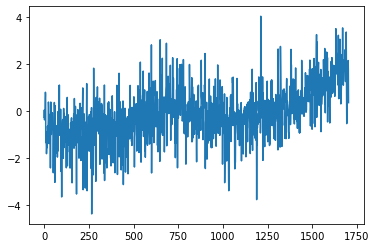

In [11]:
plt.plot(df['T_anomaly'])

In [3]:
## select the time period to look at, including the indices needed to subset the data
nyrs = 141                    # number of years, 141 will have you end in 2020
ind_months_start = 70*12;     # month index to start.  

## Note: since python is 0 based, selecting 0 gives you the index for 
  ##the first value in the dataset (January 1880)
ind_months_end   = nyrs*12;   # month index to end.
lst = uploaded['aravg.mon.land_ocean.60N.90N.v5.0.0.202112.asc'].decode(encoding="utf-8", errors="strict").split('\n');
### open a Pandas data frame called "d" with the data only in the time period we selected above
d   = pd.Series(lst).str.split(expand=True).astype(float)[ind_months_start:ind_months_end];
d

,0,1,2,3,4,5,6,7,8,9
840,1950.0,1.0,-0.449840,0.059407,0.058413,0.000450,0.000544,1.350910,1.109221,0.241689
841,1950.0,2.0,-0.987553,0.044901,0.043903,0.000450,0.000549,1.273497,1.063967,0.209530
842,1950.0,3.0,0.115493,0.001512,0.000526,0.000450,0.000536,0.847723,0.824788,0.022935
843,1950.0,4.0,-0.561057,0.011338,0.010404,0.000450,0.000484,0.895149,0.793148,0.102001
844,1950.0,5.0,-0.555887,0.004508,0.003587,0.000450,0.000471,0.509163,0.449268,0.059895
...,...,...,...,...,...,...,...,...,...,...
1687,2020.0,8.0,1.593928,0.023480,0.021551,0.000064,0.001865,0.366534,0.243894,0.122640
1688,2020.0,9.0,1.765897,0.007860,0.005479,0.000064,0.002317,0.436454,0.401759,0.034696
1689,2020.0,10.0,2.057197,0.066049,0.063939,0.000064,0.002046,0.623070,0.299442,0.323628
1690,2020.0,11.0,3.372409,0.149071,0.147338,0.000064,0.001669,0.977138,0.525470,0.451667


####**Question 1 (10p)**: Write code to print the shape of your data frame.  Write code to print the first years worth of Arctic temperature anomaly values.  Write code to calculate how many months and how many years are in your dataset.

In [4]:
### put your code here ###

# print the shape of d
print(d.shape) 

# print the first year (i.e., the first 12 months) Arctic temperature anomalies
print(d[0:12][2])

# Calculate how many months and years are in your dataset.
print(f'The number of months is {d[:][2].shape}')
print(f'The number of years is {np.round((len(d[:][2])/12))}')

(852, 10)
840   -0.449840
841   -0.987553
842    0.115493
843   -0.561057
844   -0.555887
845   -0.310551
846   -0.764961
847   -0.397572
848    0.011776
849    0.371474
850   -0.264546
851    0.432114
Name: 2, dtype: float64
The number of months is (852,)
The number of years is 71.0


**STEP 4: We're ready for data science calculations.  Let's go!**

####**Question 2 (10p)**: Write code to calculate the annual mean from the monthly mean data.  
Check your calculation by printing the shape and the values.



In [5]:
### put your code here ###

## calculate the annual mean (d_yr) from the monthly mean (d)
d_yr = d.groupby(d[0][:]).mean()

## print the shape of the annual mean.  should be [nyrs,10]
print(d_yr.shape)

# print the annual mean temperature anomaly values
print(d_yr[2])

print(d_yr)


(71, 10)
0
1950.0   -0.280093
1951.0   -0.188805
1952.0   -0.380118
1953.0    0.488755
1954.0    0.231666
            ...   
2016.0    2.115133
2017.0    1.769208
2018.0    1.362012
2019.0    1.912878
2020.0    2.031738
Name: 2, Length: 71, dtype: float64
             0    1         2         3         4         5         6  \
0                                                                       
1950.0  1950.0  6.5 -0.280093  0.028734  0.027755  0.000450  0.000529   
1951.0  1951.0  6.5 -0.188805  0.035955  0.035022  0.000390  0.000543   
1952.0  1952.0  6.5 -0.380118  0.028491  0.027593  0.000321  0.000578   
1953.0  1953.0  6.5  0.488755  0.043145  0.042288  0.000250  0.000608   
1954.0  1954.0  6.5  0.231666  0.047179  0.046333  0.000208  0.000639   
...        ...  ...       ...       ...       ...       ...       ...   
2016.0  2016.0  6.5  2.115133  0.062433  0.060648  0.000064  0.001720   
2017.0  2017.0  6.5  1.769208  0.062433  0.060648  0.000064  0.001720   
2018.0  2018.0

####**Question 3 (10p)**: Make a timeseries plot of the annual mean data and the monthly mean data.
Label your x-axes, y-axes, and the title of the plot.

In [7]:
##Before we plot - Let's create a time axis in years (one value per month, each value in the middle of the month).
timemo = d[0][:] + (1/24)+((d[1][:]-1)*1/12)
print(d.shape)
print(timemo.shape)
print(timemo)
print(d)

(852, 10)
(852,)
840     1950.041667
841     1950.125000
842     1950.208333
843     1950.291667
844     1950.375000
           ...     
1687    2020.625000
1688    2020.708333
1689    2020.791667
1690    2020.875000
1691    2020.958333
Length: 852, dtype: float64
           0     1         2         3         4         5         6  \
840   1950.0   1.0 -0.449840  0.059407  0.058413  0.000450  0.000544   
841   1950.0   2.0 -0.987553  0.044901  0.043903  0.000450  0.000549   
842   1950.0   3.0  0.115493  0.001512  0.000526  0.000450  0.000536   
843   1950.0   4.0 -0.561057  0.011338  0.010404  0.000450  0.000484   
844   1950.0   5.0 -0.555887  0.004508  0.003587  0.000450  0.000471   
...      ...   ...       ...       ...       ...       ...       ...   
1687  2020.0   8.0  1.593928  0.023480  0.021551  0.000064  0.001865   
1688  2020.0   9.0  1.765897  0.007860  0.005479  0.000064  0.002317   
1689  2020.0  10.0  2.057197  0.066049  0.063939  0.000064  0.002046   
1690  2020.0  1

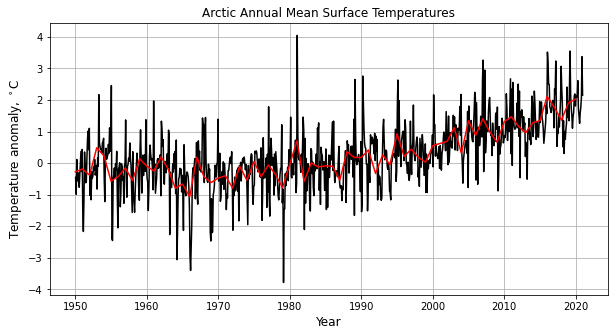

In [10]:
### put your code here ###

## define a function to plot the data (data in input should have the same format as d)
def plot_data(timemo,d,xlab):
  plt.close()
  plt.figure(figsize=(10,5))
  plt.plot(timemo,d[2], color = 'black')
  # show title, labels, grid
  font = {'family': 'Sans',
  'color': 'black', 'weight': 'normal', 'size': 12,}
  plt.title('Arctic Annual Mean Surface Temperatures', fontdict = font) 
  plt.xlabel(xlab, fontdict = font)
  plt.ylabel('Temperature anomaly, $^\circ$C', fontdict = font)
  plt.grid()

## call the function to plot the monthly data
plot_data(timemo,d,'Year')

## call the function to plot the annual mean data
plt.plot(d_yr[0],d_yr[2], color = 'red');

####**Question 4 (10p)**: Make a histogram of the annual mean and the monthly mean anomalies

[-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5  4. ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


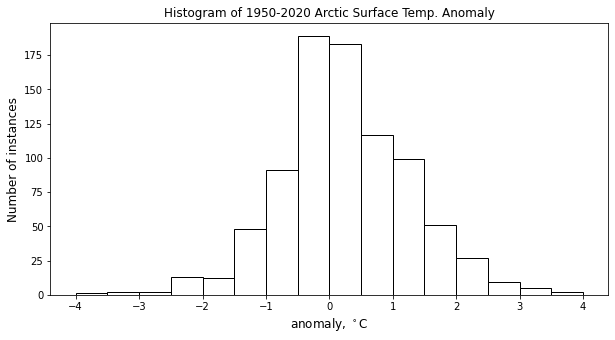

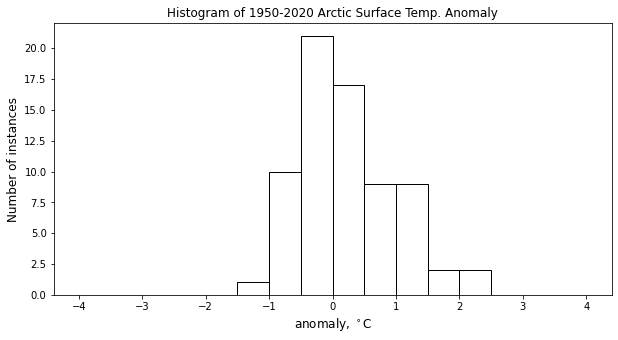

In [25]:
### put your code here ###

## define bins for the histogram, from -4 to 4 with a bin size of 0.5
delta= .5                               ## bin size
minbin=-4.0                             ## minimum bin value
maxbin=4.5                              ## maximum bin value
hist_bins = np.arange(minbin,maxbin,delta) ## bins, orders the bins

#delta= 1.0                               ## bin size
#minbin=-4.0                             ## minimum bin value
#maxbin=5.0                              ## maximum bin value
#hist_bins = np.arange(minbin,maxbin,delta) ## bins


## print your histograms to check they go from -4 to 4 with a bin size of 0.5
print(hist_bins)

## define a function to plot a histogram of the data (data in input should have the same format as d)
def plot_data_hist(d,hist_bins):
  h, mids = np.histogram(d[2],bins=hist_bins)
  plt.figure(figsize=(10,5))
  plt.hist(d[2],bins=mids,facecolor='w',edgecolor="k") 
  font = {'family': 'Sans','color': 'black', 'weight': 'normal', 'size': 12,}
  plt.title('Histogram of '+f"{np.int(min(d[0][:]))}"+'-'+f"{np.int(max(d[0][:]))}"+' Arctic Surface Temp. Anomaly', 
            fontdict = font) 
  plt.xlabel('anomaly, $^\circ$C', fontdict = font) 
  plt.ylabel("Number of instances", fontdict = font)

# call the function and make a plot the monthly mean
plot_data_hist(d,hist_bins)

# call the function and make a plot the yearly mean
plot_data_hist(d_yr,hist_bins)

####**Question 5 (10p)**: Write 2-3 sentences to compare the histograms.
Does the annual mean or the monthly mean have a broader distribution?
Why?

How do these histograms for the Arctic differ from those you plotted for the 
global mean in application lab #1?

**Answer**: The monthly mean histogram is broader than the annual mean histogram because the annual mean averages more data than the monthly mean.  When you average more data, the mean value gets smaller.  When compared to the global temperature anomaly histograms plotted in application lab #1, these Arctic temperature anomaly histograms are broader.  These broader Arctic histograms indicate larger departures from the mean for Arctic temperature anomalies than for global temperature anomalies.

####**Question 6 (10p)**: Standardize your data (the annual mean values) and call the variable "d_stdzd_yr"

In [ ]:
### write your code here ###

## standardize the annual mean data
d_stdzd_yr = (d_yr[2]-d_yr[2].mean())/d_yr[2].std()

## print the shape of the standardized data
print(d_stdzd_yr.shape)

## print the mean and the standard deviation, they should be 0 and 1 respectively
print('Mean of standardized data : ' + f"{d_stdzd_yr.mean():.3f}" + ' degC')
print('Standard Deviation of standardized data : ' + f"{d_stdzd_yr.std():.3f}" + ' degC')


(71,)
Mean of standardized data : -0.000 degC
Standard Deviation of standardized data : 1.000 degC


####**Question 7 (10p)**: Calculate the 95% confidence intervals to compare the first 40 years of annual mean values with the last 40 years of annual mean values.  *(Hint: Print the length of the arrays containing the first and the last 40 years of data to check your coding...)*. What statistic are you using (t or z) and why? Are the two periods different?

**Answer**: Here I am using the z-statistic because my dataset is big (N>30).  The confidence intervals between the two periods do not overlap. Thus, I conclude that sample1 and sample2 are statistically different at the 95% confidence level.

In [ ]:
### write your code here ###

## create a pandas data frame with just the year and the temperature
df = pd.DataFrame({'Year':d_yr[0],'T_anom':d_stdzd_yr})
print(df.shape)
#df ## uncomment me to look at your data frame 

(71, 2)


In [ ]:
### write your code here ###

## calculate the sample mean and standardard deviation for the first 40 years
## call the output "sample1"
minyear=1950
maxyear=1989
sample1=df[(df["Year"]>(minyear-1)) & (df["Year"]<(maxyear+1))];

## calculate the sample mean and standardard deviation for the last 40 years
## call the output "sample2"
minyear=1981
maxyear=2020
sample2=df[(df["Year"]>(minyear-1)) & (df["Year"]<(maxyear+1))];

## check the shapes of sample1, sample2 - are they what you expect?
print(sample1.shape)
print(sample2.shape)

## calculate the mean and standard deviation of sample1, sample2
sample1_mean=sample1['T_anom'].mean()
print(np.round(sample1_mean,2))
sample1_std=sample1['T_anom'].std()
print(np.round(sample1_std,2))
N1=sample1.shape[0]
sample2_mean=sample2['T_anom'].mean()
print(np.round(sample2_mean,2))
sample2_std=sample2['T_anom'].std()
print(np.round(sample2_std,2))
N2=sample2.shape[0]


(40, 2)
(40, 2)
-0.65
0.5
0.57
0.93


In [ ]:
## Define a function to calculate the 95% confidence limits
def zstat(sample_mean,sample_std,N):
  print('CONFIDENCE INTERVALS USING Z-STATISTIC')
  print(f'The sample mean is {np.round(sample_mean,2)}')
  print(f'The sample standard deviation is {np.round(sample_std,2)}')
  print(f'N={N}')
  ## Note: Python calculates left/lower-tail probabilities by default, 
  ## so for the 95% confidence interval, use 0.975
  zstat95=stats.norm.ppf(0.975)
  low_limit95=sample_mean-zstat95*(sample_std/np.sqrt(N))
  high_limit95=sample_mean+zstat95*(sample_std/np.sqrt(N))

  print(f'The 95% confidence interval on the true mean is \
  {np.round(low_limit95,2)} and {np.round(high_limit95,2)}')

## execute the function to find the confidence intervals
zstat(sample1_mean,sample1_std,N1)
zstat(sample2_mean,sample2_std,N2)


CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is -0.65
The sample standard deviation is 0.5
N=40
The 95% confidence interval on the true mean is   -0.81 and -0.49
CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 0.57
The sample standard deviation is 0.93
N=40
The 95% confidence interval on the true mean is   0.28 and 0.86


####**Question 8 (20p)**: Let's do some bootstrapping... Let's say your friend suspects that the fact that it was warmer than usual temperatures in the Arctic over the last 20 years just happened by chance.  First, complete the coding to undertake a bootstrapping analysis to address your friend's suspicion. Then, explain in 3-5 sentences what you have done and why you are confident that the last 20 years of warm anomalies in the Arctic didn't happen by chance. Include the distribution assumptions that are made.  


*Note: You can work with either the standardized or the non-standardized data - but you need to stay consistent. 
The provided calculations use the non-standardized data (numpy array = data).*

**Answer**: The histogram of bootstrapped values shows what you might expect to get by chance by randomly selecting values of Arctic temperature anomalies.  The temperature anomaly in the Arctic for the last 20 years is well outside of the bootstrapped distribution suggesting that it is very unlikely that the value occurred by chance.  Thus, the last 20 years have been warmer in the Arctic than they were historically.

In [ ]:
### First - we'll convert from a pandas array to a numpy array.
### Google to find out the difference between a pandas data frame and a numpy array...
print(d_yr.shape)
print(type(d_yr))
d_yr_numpy=d_yr.to_numpy(dtype=object)
print(type(d_yr_numpy))
print(d_yr_numpy.shape)
data=d_yr_numpy[:,2]
#print(data.shape)
#print(data)
print(f'The mean Arctic temperature anomaly (deg C) is {np.round(np.mean(data),2)}')

(71, 10)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(71, 10)
The mean Arctic temperature anomaly (deg C) is 0.25


In [ ]:
## calculate the mean of the last 20 years and call it "mean_last20"

### put your code here ###
#mean_last20=

### this is the non-standardized data
#print(data)
print(data[-20:].shape)
print(data[-20:])
mean_last20=np.mean(data[-20:])
print(mean_last20)

### You can work with either the standardized or the non-standardized data - 
## but you need to stay consistent. 
## This notebook uses the non-standardized data.
## This calculation is for the the standardized data. 
#last20 = df[(df["Year"]>(2000)) & (df["Year"]<(2021))];
#print(len(last20))
#mean_last20 = last20['T_anom'].mean()
#print(mean_last20)
#print(last20)

(20,)
[0.6210705 0.6859864999999999 1.1250264166666666 0.31171
 1.3424789166666666 0.8815274999999999 1.4048908333333332
 0.9823127500000001 0.66217525 1.3125238333333333 1.4665075833333334
 1.16669375 0.9632525 1.2784437499999999 1.3448650000000002 2.1151325
 1.769208 1.3620118333333335 1.9128782500000001 2.0317385]
1.2370217083333332


In [ ]:
## Here's the bootstrapping
## Randomly grab 20 years from the data and take the mean 
## Repeat this random grab 25000 times to build up a distribution of sample means with N=20

sample_length = 20
sample_means = []
N_iterations=25000
for j in np.arange(0,N_iterations):
    ir = stats.randint.rvs(0,len(data)-1,size = sample_length)
    #print(data[ir])
    sample_means.append(data[ir].mean())
    #print(ir)
    #print(ir.shape)
    #print(data[ir].mean())

print(f'The mean of the bootstrapped distribution is {np.mean(sample_means)}')
print(f'The min of the bootstrapped distribution is {np.min(sample_means)}')
print(f'The max of the bootstrapped distribution is {np.max(sample_means)}')

The mean of the bootstrapped distribution is 0.22760392843666669
The min of the bootstrapped distribution is -0.3493054958333334
The max of the bootstrapped distribution is 0.9550380458333333


In [ ]:
## To Sanity Check My Code
## Set N_iterations to 2 and uncomment the print statements.
## Does it all make sense?

### put your code here ###
sample_length = 20
sample_means_test = []
N_iterations=2
for j in np.arange(0,N_iterations):
    ir = stats.randint.rvs(0,len(data)-1,size = sample_length)
    print(data[ir])
    sample_means_test.append(data[ir].mean())
    print(ir)
    print(ir.shape)
    print(data[ir].mean())

print(f'The mean of the bootstrapped distribution is {np.mean(sample_means_test)}')
print(f'The min of the bootstrapped distribution is {np.min(sample_means_test)}')
print(f'The max of the bootstrapped distribution is {np.max(sample_means_test)}')


[1.3448650000000002 -0.5719960833333334 0.050588583333333326
 0.17558700000000002 1.3125238333333333 0.17972283333333336
 0.9300104166666667 -0.436568 -0.1966894166666667 0.9823127500000001
 -0.09731125 -0.7920393333333333 -0.6621848333333333 -0.5436995
 0.17558700000000002 0.23166558333333334 -1.0682896666666666
 0.8815274999999999 -0.7808000833333333 0.23166558333333334]
[65  5 25 48 60 39 45 18 13 58 23 22 15 24 48  4 16 56 29  4]
(20,)
0.06732389583333337
[0.36477241666666665 0.005620583333333336 0.9823127500000001
 -0.10169966666666665 0.9823127500000001 0.23166558333333334 0.6210705
 -0.05023416666666666 0.23166558333333334 0.19565741666666667
 -0.3801175833333333 0.36477241666666665 0.4887551666666667
 1.3620118333333335 0.21161383333333336 0.23166558333333334
 0.6859864999999999 0.9632525 -0.4011328333333333 -0.05023416666666666]
[38 33 58 36 58  4 51 44  4 12  2 38  3 68 46  4 52 63 21 44]
(20,)
0.34698585000000004
The mean of the bootstrapped distribution is 0.207154872916666

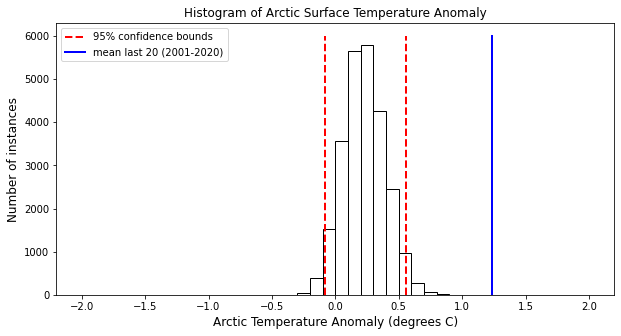

In [ ]:
### Plot a histogram of the bootstrapped means.
### This distribution of bootstrapped means shows the probability of any particular mean happening by chance
### based on the data that we have...

### put your code here ###
## define bins for the histogram, from -2 to 2 with a bin size of 0.1
delta= .1                              ## bin size
minbin=-2.0                            ## minimum bin value
maxbin=2.1                             ## maximum bin value
hist_bins = np.arange(minbin,maxbin,delta) ## bins

## print your histograms to check they go from -2 to 2 with a bin size of 0.1
#print(hist_bins)

## define a function to plot an histogram of the data (data in input should have the same format as sample_means)
def plot_data_hist_numpy(sample_means,hist_bins):
  h, mids = np.histogram(sample_means,bins=hist_bins)
  plt.figure(figsize=(10,5))
  plt.hist(sample_means,bins=hist_bins,facecolor='w',edgecolor="k") 
  font = {'family': 'Sans','color': 'black', 'weight': 'normal', 'size': 12,}
  plt.title('Histogram of Arctic Surface Temperature Anomaly', fontdict = font) 
  plt.xlabel('Arctic Temperature Anomaly (degrees C)', fontdict = font) 
  plt.ylabel("Number of instances", fontdict = font)

# call the function and make a plot the monthly mean
plot_data_hist_numpy(sample_means,hist_bins)
a1 = np.percentile(sample_means,2.5);
a2 = np.percentile(sample_means,100.-2.5);
plt.plot((a1,a1),(0,6000),'--',color = 'red', linewidth = 2, label = '95% confidence bounds');
plt.plot((a2,a2),(0,6000),'--',color = 'red', linewidth = 2);
plt.plot((mean_last20,mean_last20),(0,6000),'-',color = 'blue', linewidth = 2, label = 'mean last 20 (2001-2020)');
plt.legend();

####**Question 9 (10p)**: Use the Python function stats.norm.cdf to calculate: What is the probability that z lies within 2 standard deviations of the mean?  In other words, what percentage of a normal distribution lies within 2 standard deviations of its mean? Describe how you are using the function to calculate the answer in 2-3 sentences.

In [ ]:
### your code here

answer=stats.norm.cdf(2,loc=0,scale=1)-stats.norm.cdf(-2,loc=0,scale=1)
print(f'answer: {np.round(answer*100,1)} %')

answer: 95.4 %


**Answer**: The function (stats.norm.cdf) calculates the probabily that a value lies above/below a given number of standard deviations of the mean.  Since here we want the probability that the value falls within 2 standard deviations of the mean - we difference the function with a value of 2 and a value of -2.  We get 95.4%.  

Another way to say this "Subtracting the probability of less than -2 (stats.norm.cdf(2,loc=0,scale=1) from the probability of greater than 2 (stats.norm.cdf(-2,loc=0,scale=1)), the result is the percentage of values between -2 and 2."